# Explore here

In [39]:
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import pickle

In [41]:
url  = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

In [42]:
df.head()
#target variable = health-related

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [43]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [44]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

**EDA**

In [ ]:
df.drop(["COUNTY_NAME","STATE_NAME"], axis=1, inplace = True)

In [ ]:
df_list = sorted(list(df.columns))
df_list

['% Asian-alone',
 '% Black-alone',
 '% Hawaiian/PI-alone',
 '% NA/AI-alone',
 '% Two or more races',
 '% White-alone',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19 y/o % of total pop',
 '19-Oct',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'Active General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Asian-alone pop',
 "Bachelor's degree or higher 2014-18",
 'Black-alone pop',
 'CI90LBINC_2018',
 'CI90UBINC_2018',
 'CKD_Lower 95% CI',
 'CKD_Upper 95% CI',
 'CKD_number',
 'CKD_prevalence'

<Axes: >

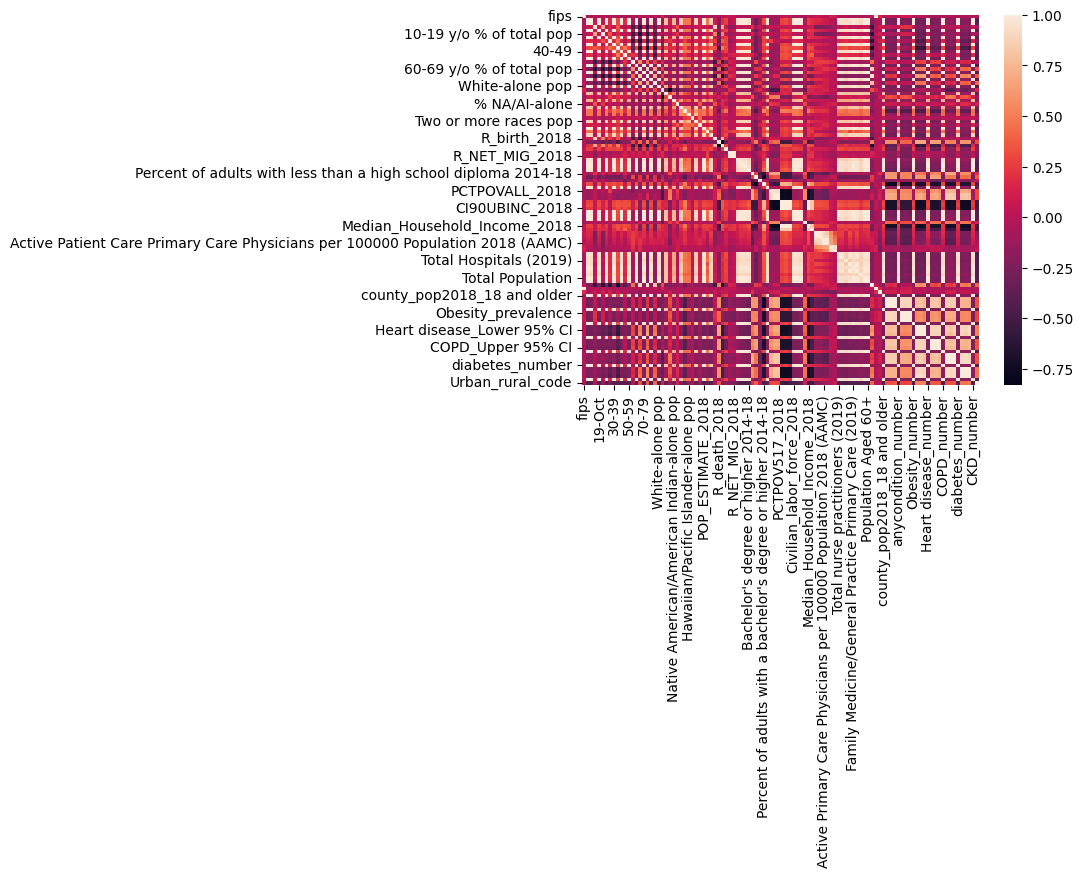

In [50]:
sns.heatmap(df.select_dtypes(include="number").corr())

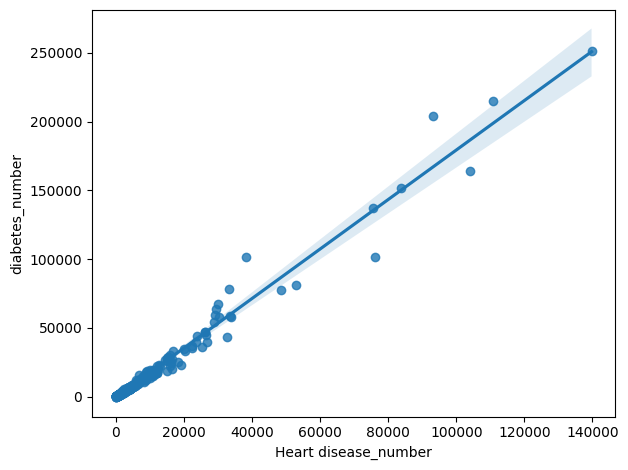

In [57]:
sns.regplot(data=df[df["Heart disease_number"]<200000].sample(500), x="Heart disease_number", y="diabetes_number")
plt.tight_layout()
plt.show()

<Axes: xlabel='White-alone pop', ylabel='Count'>

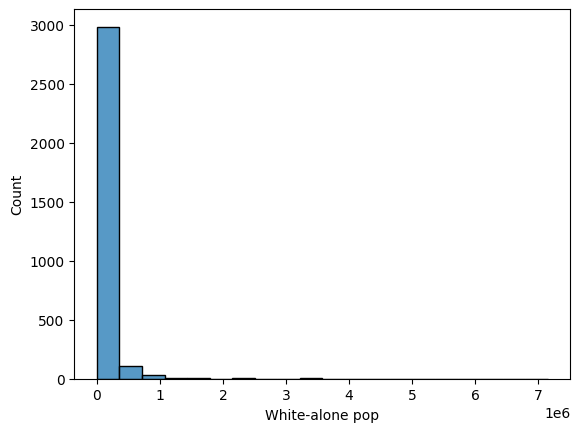

In [72]:
sns.histplot(data=df, x="White-alone pop", bins=20)

Machine Learning

In [ ]:
# We divide the dataset into training and test samples
X = df.drop("Heart disease_number", axis = 1)
y = df["Heart disease_number"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,2314,13.7,12.6,14.9,2823,3.8,3.5,4.1,771,6
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,...,4097,13.1,11.9,14.2,5416,3.5,3.2,3.8,1454,5
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,...,2792,12.2,11.2,13.1,3698,2.9,2.7,3.1,871,2
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,...,5716,11.2,10.4,12.0,7913,3.0,2.8,3.2,2118,3
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,...,10002,12.5,11.7,13.4,12987,3.4,3.2,3.6,3490,4


In [ ]:
df_list = sorted(list(X.columns))
df_list

['% Asian-alone',
 '% Black-alone',
 '% Hawaiian/PI-alone',
 '% NA/AI-alone',
 '% Two or more races',
 '% White-alone',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19 y/o % of total pop',
 '19-Oct',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'Active General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Asian-alone pop',
 "Bachelor's degree or higher 2014-18",
 'Black-alone pop',
 'CI90LBINC_2018',
 'CI90UBINC_2018',
 'CKD_Lower 95% CI',
 'CKD_Upper 95% CI',
 'CKD_number',
 'CKD_prevalence'

<Axes: ylabel='Frequency'>

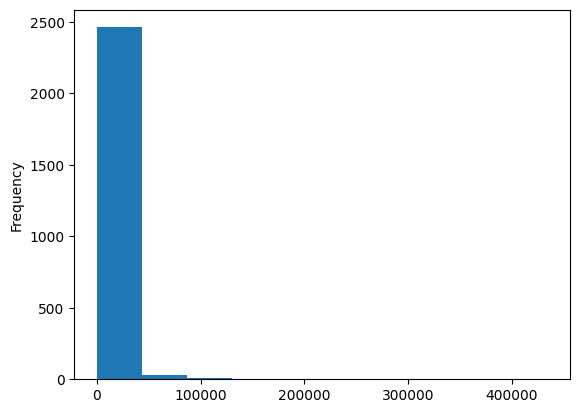

In [ ]:
y_train.plot.hist()

<Axes: ylabel='Frequency'>

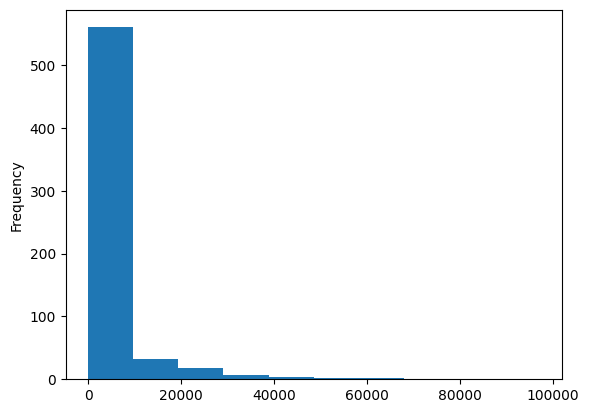

In [ ]:
y_test.plot.hist()

In [ ]:
X_train.to_csv("X_Train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

In [ ]:

selection_model = SelectKBest(f_classif, k = 58)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()


,TOT_POP,0-9,19-Oct,20-29,20-29 y/o % of total pop,30-39,40-49,50-59,60-69,70-79,...,county_pop2018_18 and older,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Upper 95% CI,Obesity_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
0,26625.0,3221.0,3463.0,2922.0,10.974648,2829.0,2831.0,3831.0,3860.0,2460.0,...,20545.0,51.9,10213.0,38.6,40.4,7930.0,2314.0,2823.0,771.0,6.0
1,51266.0,5272.0,5751.0,5137.0,10.020286,5341.0,5880.0,7885.0,8271.0,4801.0,...,41304.0,49.2,19282.0,33.2,35.1,13713.0,4097.0,5416.0,1454.0,5.0
2,37779.0,3915.0,5118.0,6202.0,16.416528,4363.0,4451.0,5107.0,4349.0,2713.0,...,30379.0,49.1,14283.0,33.7,35.4,10238.0,2792.0,3698.0,871.0,2.0
3,91984.0,11163.0,12646.0,11595.0,12.605453,11357.0,11444.0,12774.0,10791.0,6736.0,...,70506.0,48.7,33057.0,36.5,38.1,25735.0,5716.0,7913.0,2118.0,3.0
4,134487.0,16698.0,17666.0,17281.0,12.849569,15993.0,15845.0,17982.0,16909.0,10074.0,...,103686.0,49.8,49754.0,37.5,39.0,38882.0,10002.0,12987.0,3490.0,4.0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns=X_test.columns)

X_train_scal.head()

,TOT_POP,0-9,19-Oct,20-29,20-29 y/o % of total pop,30-39,40-49,50-59,60-69,70-79,...,county_pop2018_18 and older,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Upper 95% CI,Obesity_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
0,0.002626,0.002666,0.002795,0.001877,0.316717,0.001876,0.002094,0.002923,0.003786,0.004286,...,0.002584,0.635347,0.003535,0.674352,0.681690,0.003768,0.005315,0.002953,0.003230,1.0
1,0.005064,0.004363,0.004641,0.003299,0.289175,0.003549,0.004352,0.006027,0.008135,0.008375,...,0.005206,0.574944,0.006687,0.518732,0.532394,0.006525,0.009422,0.005676,0.006103,0.8
2,0.003730,0.003240,0.004130,0.003983,0.473765,0.002898,0.003294,0.003900,0.004268,0.004728,...,0.003826,0.572707,0.004950,0.533141,0.540845,0.004868,0.006416,0.003872,0.003651,0.2
3,0.009094,0.009239,0.010205,0.007447,0.363781,0.007555,0.008474,0.009770,0.010619,0.011755,...,0.008895,0.563758,0.011475,0.613833,0.616901,0.012255,0.013152,0.008298,0.008895,0.4
4,0.013300,0.013820,0.014257,0.011098,0.370826,0.010642,0.011733,0.013758,0.016651,0.017585,...,0.013086,0.588367,0.017278,0.642651,0.642254,0.018522,0.023026,0.013626,0.014666,0.6


In [ ]:
start_time = timeit.default_timer()
model = LinearRegression()
model.fit(X_train, y_train)
print("training elapsed time ", timeit.default_timer()-start_time)

training elapsed time  0.07790685200001235


Assess Model

In [ ]:
y_train_pred = model.predict(X_train)
print(list(y_train_pred))
print(y_train.to_list())

[np.float64(1981.3541208799934), np.float64(3925.087161876911), np.float64(2478.2987739811865), np.float64(5483.120245738515), np.float64(8939.18811730409), np.float64(34991.70197451905), np.float64(1620.5405439946644), np.float64(177.98660878560895), np.float64(32587.506779377127), np.float64(338.6172731533094), np.float64(16944.812702354142), np.float64(569.9552104090816), np.float64(62.35325888805312), np.float64(14676.909881210711), np.float64(729.8608794256226), np.float64(75.53260527140884), np.float64(1330.6873781252798), np.float64(33557.530359408775), np.float64(25148.136757832643), np.float64(2537.18151333733), np.float64(1898.6882358973814), np.float64(858.6054246459826), np.float64(212.6532223450776), np.float64(7169.839037174912), np.float64(583.5650883559163), np.float64(1275.4669023912606), np.float64(9132.02191488582), np.float64(9342.693807578238), np.float64(3001.510512227284), np.float64(311.6542100566599), np.float64(-66.26014032272474), np.float64(6492.156743859622

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[ 6.84732108e+02  1.33685227e+04  1.79638414e+03  6.84813858e+03
  1.11946079e+04  1.51708722e+03  6.89198616e+02  1.36334036e+03
  3.69073628e+02  7.22554593e+02  1.32983323e+03  1.37849717e+02
  4.32736141e+03  1.43272692e+03  9.27927803e+03  2.47097689e+03
  5.27089378e+04  1.16464670e+03  1.95169781e+03  4.39418551e+02
  1.51980676e+03  6.26080551e+02  7.63155161e+02  4.84767931e+02
  9.78603190e+04  2.42046130e+03  6.78543773e+02  2.09305226e+03
  8.78688961e+02  1.15174909e+02  1.15404288e+03  1.89640889e+03
  2.61046928e+03  3.17174580e+03  8.62341683e+03  1.52760762e+03
  2.63012370e+03  1.20959436e+03  8.68557891e+02  1.71880816e+03
  1.32409445e+03  8.92238425e+03  3.46699994e+02  1.17235197e+02
  2.61871912e+03  6.58685518e+02  2.58288896e+02  7.89019371e+03
  1.08609031e+03  7.95300432e+02  1.85091050e+04  3.10686166e+02
  1.53638660e+03  5.14141756e+02  8.67922216e+03  6.55158162e+02
  3.38701937e+04  1.16321557e+03  3.65252460e+03  8.51469330e+02
  8.29373578e+03  3.27407

In [ ]:
print(r2_score(y_train, y_train_pred))

0.9994871077439599


In [ ]:
print(r2_score(y_test, y_pred))

0.9982487142238489


In [ ]:
print(mean_absolute_percentage_error(y_train, y_train_pred))

0.08768399704894572


In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.0728212346555419


In [ ]:
print(mean_squared_error(y_train, y_train_pred)**0.5)

380.6615980443503


In [ ]:
print(mean_squared_error(y_test, y_pred)**0.5)

391.512608859045


In [ ]:
y_test.shape

(628,)

In [ ]:

lasso_model = Lasso(alpha = 0.1, max_iter = 300)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.011e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(r2_score(y_test, y_pred))

0.995298779109358


In [ ]:
print(mean_squared_error(y_test, y_pred)**0.5)

641.4644190193277


In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.1303624899349288


In [ ]:
ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40634e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
print(r2_score(y_test, y_pred))

0.9982487085890764


In [ ]:
print(mean_squared_error(y_test, y_pred)**0.5)

391.5132387056186


In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.07282076469590551


In [ ]:
# Hyperparameter grid (adjust as needed)
hyperparams = {
    "fit_intercept": [True, False],
   # "normalize": [True, False]
}

# We initialize the grid
random = RandomizedSearchCV(model, hyperparams, scoring = "neg_mean_squared_error", cv = 5)
random

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error')

In [ ]:
# Fit the model to your data
random.fit(X_train, y_train)


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error')

In [ ]:
random_best  = random.best_estimator_
random_best

LinearRegression(fit_intercept=False)

In [ ]:
print(r2_score(y_test, y_pred))

0.9982487085890764


In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.07282076469590551
